# Linear Regression

## Introduction

>__Linear regression predicts continuous outputs__, hence the regression part of the name.

Linear regression makes predictions that are simply a __`w`eighted__ combination (a linear combination) of the inputs (plus some offset called __`b`ias__). It is described by a linear function:

$$
    y = wx + b
$$



<p align=center><img width=700 src=images/linear_model.jpg></p>

In the future, we will explore much more complex, nonlinear relationships between the features and labels that we wish to model. 

However, __do not underestimate linear regression__ as it is often used in statistics and to explain numerous phenomena. At the end of the lesson, we will see when it should be used in the real world.

## Loading Dataset

Once again, we will use the `California` dataset from `sklearn`. Additionally, we will split it into validation and test:

In [ ]:
from sklearn import datasets, model_selection

# 15% for validation and test, 70% for training in total
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

print(X_train.shape, y_train.shape)

(14448, 8) (14448,)



## Hypothesis

The functions that a model represents are often referred to as the **hypothesis**.

<p align=center><img width=800 src=images/linear_model_example.jpg></p>

We will create a model that can make predictions for many examples simultaneously by expressing the hypothesis in a vector form, as shown below.

<p align=center><img width=700 src=images/linear_model_vector.jpg></p>

Here is what the computation might look like numerically.

<p align=center><img width=700 src=images/linear_model_vector_example.jpg></p>



## Mathematical Formula of the Model


The formula below presents a linear regression for a single example __with multiple features__:

$$
\begin{equation}
    y = w_1x_1 + w_2x_2 + ... + w_Nx_N + b = \sum_{i=1}^{N} w_ix_i + b
\end{equation}
$$

Essentially, each feature in our sample is multiplied by a weight.

Next, we implement our first ML model in code.

## Multiple Features

Here, we will explore multiple features. Here is what our weights will look like:

<p align=center><img width=700 src=images/w_vector.jpg></p>

The weights variable (w) becomes a row vector; consequently, we need to transpose it when we multiply it by the X matrix (or take a `dot` product of `data` and `weights`).

<p align=center><img width=800 src=images/vector_linear_regression.jpg></p>

## Univariate vs Multivariate

Occasionally, you may find a dychotomy between univariate and multivariate linear regressions.

> Univariate linear regression involves __one or multiple features,__ but __a single prediction target.__

> Conversely, __multivariate linear regression,__ as you may have guessed, involves __one or multiple variables (features),__ but __multiple prediction targets__ (which are correlated with each other).

In this notebook, we will explore __univariate__ only; however, we will cover __multivariate__ when we learn multiclass classification.

## Example

The task here is `LinearRegression` implementation.

- Create a class `LinearRegression` that accepts a single `n_features` argument during initialisation.
    - Create `W` and `b` variables during initialisation. One of shape `(n_features, 1)` and `bias` of shape `1`, initialised with a random normal distribution.
- Create a `__call__` function (find out what it does and what a functor is) that accepts `X` (`np.array`). It should return the predictions made by our linear-regression analysis (see the formulas in the figure above; only two operations are required).
- Create the `update_params` function which accepts `W` and `b` and assigns them to appropriate variables in `self`.

In [19]:
import numpy as np

class LinearRegression:
    def __init__(self, n_features: int): # initalise parameters
        np.random.seed(10)
        self.W = np.random.randn(n_features, 1) ## randomly initialise weight
        self.b = np.random.randn(1) ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate the output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W ## set this instance's weights to the new weight value passed to the function
        self.b = b ## do the same for the bias

In [25]:
model = LinearRegression(n_features=8)  # instantiate our linear model
y_pred = model(X_test)  # make predictions with data
print("Predictions:\n", y_pred[:10]) # print the first 10 predictions

Predictions:
 [[1482.14731583]
 [3169.69576072]
 [1131.67756962]
 [ 756.45841866]
 [ 963.42420785]
 [ 696.58323643]
 [ 859.12613003]
 [ 332.18098164]
 [ 890.04023052]
 [ 496.39589958]]


In [21]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

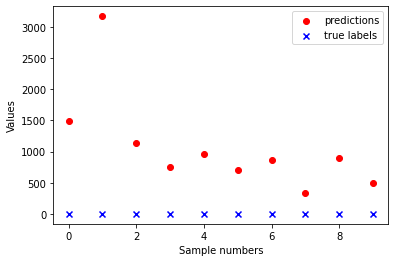

In [22]:
plot_predictions(y_pred[:10], y_test[:10])

### Analysis

As you can observe, the predictions of our model are __way off__. This occurred because we initialised our model with random weights and biases.

In the next section, we see how to improve this model to learn from data:

## Loss

Loss enables the measurement of the performances of models.

As mentioned in the ML system design process, we need to set a baseline and attempt to surpass it as we train more models. However, to obtain a quantitative measure of the model performance, the loss value is required.

> The **loss** should measure __the performance of our model__. 

The larger the value, the worse the model's performance. Thus, we should strive to __minimise__ the loss value, i.e. bring it as close to zero as possible.

> The loss value needs to return a **single number**, not a vector or a matrix.

__NOTE:__ minimising the objective is equivalent to maximising its negative. 

Commonly, the loss value is also called the __cost function__, although they do not have an exact relationship. We will go over the differences.

### Squared-error loss

> The loss is a function that accepts predictions and true labels and returns __a positive scalar.__

- The higher the loss value, the worse the model's performance.
- The __loss is defined on a single data point.__

The squared error is one of the loss functions __used for regression tasks,__ and it is simply defined as follows:

$$
\begin{equation}
    (\hat{y} - y)^2
\end{equation}
$$

This calculates the error (i.e. the difference between our model's prediction $\hat{y}$ and the true value $y$):

$$
\begin{equation}
    \hat{y} - y
\end{equation}
$$

Subsequently, it squares it to make the value positive. Provided that the error is not zero, the loss value will be increased, regardless of whether the prediction is below (negative error) or above (positive error) the label value.

### Mean-squared error (MSE) cost function

> The cost function is a generalisation of the loss functions for many data samples.

Therefore, the __loss__ operates on a single sample, while the __cost__ operates on multiple samples.
For the __MSE,__ we calculate the squared error for each sample and take the mean of that value:

$$
\begin{equation}
    L_{mse} = \frac{1}{N}\sum_{i}^{N}(\hat{y_i} - y_i)^2
\end{equation}
$$

There are many other criteria that are useful for different tasks (e.g. the binary cross entropy (BCE) loss for classification, which we will cover later).

As a demonstration, we will write a function to calculate the cost using the MSE loss function. It should accept an array of predictions for different example inputs, as well as an array of the corresponding example labels. Additionally, it should return a single number (scalar) that represents the MSE loss.

#### Example

Implement a `mean_squared_error` function that accepts `y_pred` and `y_true`. All the required formulas have been provided above (focus on the last one).

In [ ]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)

In [ ]:
cost = mean_squared_error(y_pred, y_train)
print(cost)

## Minimising the MSE: the analytical solution 

Now that we have our __loss__ equation, we can calculate its derivative w.r.t. the weights. When we set it to zero, we can calculate the __weights values (`W`),__ which minimise the MSE.

<p align=center><img width=900 src=images/analytical_linear_reg.jpg></p>

Next, we implement this analytical solution for the least-squares regression in code.

### Example

Now that we have the mathematical formula, we can proceed to the implementation.

- For the matrix inverse, use the [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function.
- Remember to return the `weights` part of the `matrix` first and the `bias` afterwards (`bias` is the `0` element of the result).

In [ ]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

As you may have noticed, there is no mention of the model bias in this analytical solution. 
In fact, we incorporated the model bias into our features matrix by adding an extra column filled with `1`.

<p align=center><img width=700 src=images/bias_in_weight_matrix.jpg></p>

Doing this improves the clarity of the analytical solution and enables us to solve it for only one value, $W$, rather than for $b$.

Note, however, that in practice (iterative optimisation), they are treated as separate variables (we will see more about that later).

### Updating parameters

Having found the `optimal_w`, we should update our model and observe its performance:

In [ ]:
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

### Drawbacks of computing the analytical solution

This solution involves inverting a matrix of size $R^{n \times n}$. 
Here, $n$ refers to the number of features that each example has. 

With eight features, the difficulty level is high. Furthermore, here, we only have ~20,000 samples, whereas in real life, millions or more is the standard.

However, as we will see, most problems of practical interest contain examples with many more features. 

> For example, 1080p images have more than 1,000,000 features each. 

The time complexity of inverting a matrix of size $n \times n$ is approximately $O(n^3)$. 
This indicates that obtaining the analytical solution for these kinds of real-world problems is often computationally expensive or even impossible.

Analytical solutions, however, are not the only approach that we can take (usually, we __cannot even use them__ because the close form cannot be calculated).

Shortly, we will see how to update parameters iteratively.

## Models in `sklearn`

`sklearn` comes with some common ML models that can be utilised out of the box, with an intuitive API.

(See the linear-regression [documentation](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors) for more information).

To demonstrate, we retrieve some data and load them thereafter [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Additionally, we need to import the appropriate package from `sklearn`:

In [2]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_california_housing(return_X_y=True)

model = linear_model.LinearRegression()

### Using `sklearn`'s API of models

`sklearn` ML algorithms are objects with the following general syntax:

- `__init__(*args, **kwargs)`: setup your algorithm (as shown above).
- `fit(X, [y])`: train the model on `X` (features) and `y` (targets). For unsupervised algorithms, there is no `y`.
- `predict(X)`: pass data (previously unseen) to the algorithm after the `fit` is called. This gives us predictions (`y_pred`).

With that, we can do the following:

In [3]:
model.fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5], "\n", y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744] 
 [4.526 3.585 3.521 3.413 3.422]


### Evaluating our model

Conveniently, `sklearn` provides performance __metrics__ for evaluating models.

You can view `sklearn`'s metrics [here](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). In this case, we will use the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

Below, we import `sklearn.metrics.mean_squared_error` using the `from` import syntax and display the error between the true targets and the predicted ones.

In [4]:
from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

0.5243209861846072

### Model persistance

As is known, the training (`fitting`) process is often quite expensive (in terms of time and/or computation cost). What is important is the ability to predict on unseen data.

Having established that your model works as expected, the next logical step is to save it for later use without the need to `train` on the data again.

> Model persistence is achieved by saving your ML algorithm currently held in the random access memory (RAM) to a storage (usually a hard drive), from which it can be re-instantiated at any point.

As is conventional, we do this with `sklearn`:

In [ ]:
import joblib

joblib.dump(model, "model.joblib")

### Drawbacks of `sklearn`

As `sklearn` is very high level, it does not require much knowledge to use.

However, __adequate and somewhat diverse knowledge__ is required to do ML properly.

Here are some important things to note.

- Why and what for: there are many more ways (and considerably better) to do ML.
- Knowledge of ML algorithms: it is important to know which ones to choose for different kinds of problems.
- Knowledge of possible pitfalls: ML can easily go wrong. It is important to know more about it to improve our model's performance.
- In-depth knowledge of the ideas: often, it might be a good idea to implement major ideas on your own.

Rest assured that __we will cover all of the above.__

### `sklearn` tips

- __Always attempt the easiest solution first__: create a weak baseline algorithm, and scrutinise its performance. Do not go straight to the most complicated ones. This concept is called [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in philosophy and ML as well.
- Some algorithms have attributes that might interest you. They are usually suffixed by `_`; for example, `my_algorithm.interesting_attribute_`.
- Some `__init__` functions have __many possible arguments__. Each of them influences the performance of the algorithm. Find out the ones with the highest importance and the most influence. __In `sklearn`, those arguments come in the order of most influential to least influential.__
- Many `sklearn` algorithms provide the `n_jobs` argument, which parallelises `fit`, `predict` and other functions. You can employ `n_jobs=-1` to use as many processes as there are virtual cores (it is often a reasonable amount), which improves performance tremendously.
- __Use idiomatic `sklearn`__: search the documentation, and use pipelines if possible.

## Conclusion
At this point, you should have a good understanding of

- the difference between univariate and multivariate regressions.
- how to implement a ML algorithm from scratch in Python.
- how to use the analytical solution.
- how to optimise linear regression using the analytical solution.